In [52]:
import pandas as pd
import os

In [53]:
# get all files with valence and arousal ratings
files = os.listdir('results')
files = [f for f in files if f.endswith('.csv')]
files = [f for f in files if 'valence' in f or 'arousal' in f]

# read all files and concatenate them
df = pd.concat([pd.read_csv('results/' + f) for f in files])



In [54]:
df

,Unnamed: 0,valence,arousal,part_quadrant,proj_quadrant
0,0,0.130476,0.080000,Q1,Q1
1,1,0.112381,-0.100000,Q4,Q3
2,2,-0.038095,0.153333,Q2,Q2
3,3,0.123810,0.285714,Q1,Q2
4,4,0.110476,0.279048,Q1,Q2
...,...,...,...,...,...
91,91,-0.090000,-0.263750,Q3,Q4
92,92,0.207500,0.152500,Q1,Q4
93,93,0.236250,0.105000,Q1,Q1
94,94,-0.182500,0.268750,Q2,Q2


In [55]:
# max of valence
df.loc[df['valence'] == df['valence'].min()]


,Unnamed: 0,valence,arousal,part_quadrant,proj_quadrant
41,41,-0.312381,0.229524,Q2,Q2
71,71,-0.312381,0.234286,Q2,Q2


In [56]:
maxAbsV=0.312381
maxAbsA=0.353750

In [57]:
import numpy as np
np.min(df['valence']/maxAbsV)

-0.9999998475609986

/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Quadrant in AV plane')

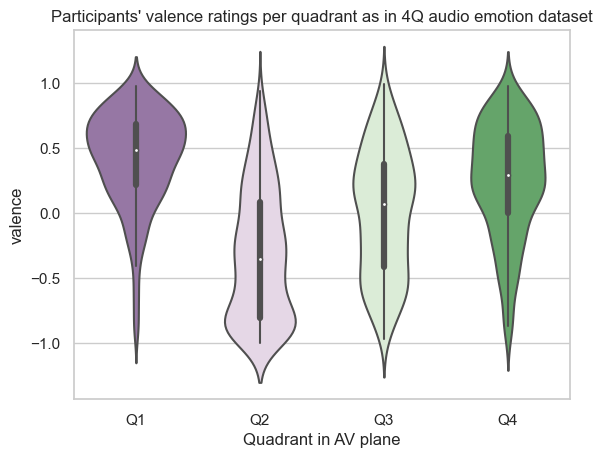

In [58]:
# plot violin plot valence and arousal ratings
import seaborn as sns
import matplotlib.pyplot as plt


df['valence']=df['valence']/maxAbsV

# plot valence ratings

# order of columns 'Q1', 'Q2', 'Q3', 'Q4'
df['proj_quadrant'] = df['proj_quadrant'].astype("category")

sns.set(style="whitegrid")
sns.violinplot(y="valence", x="proj_quadrant", data=df, palette="PRGn")



# tile plot
plt.title("Participants' valence ratings per quadrant as in 4Q audio emotion dataset")
# x label
plt.xlabel("Quadrant in AV plane")

/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Quadrant in AV plane')

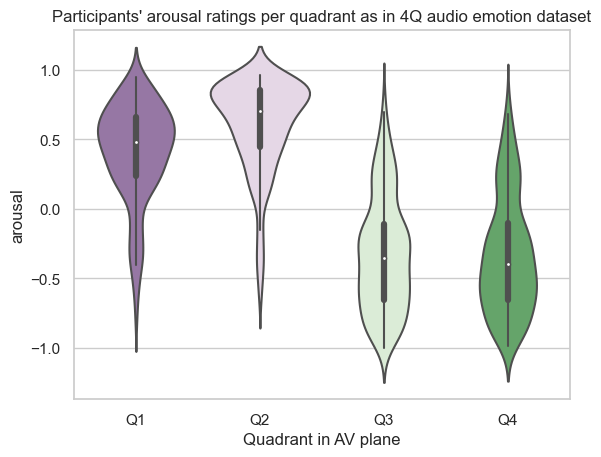

In [59]:

# plot arousal ratings

df['arousal']=df['arousal']/maxAbsA

sns.set(style="whitegrid")
sns.violinplot(y="arousal", x="proj_quadrant", data=df, palette="PRGn")

# tile plot
plt.title("Participants' arousal ratings per quadrant as in 4Q audio emotion dataset")
# x label
plt.xlabel("Quadrant in AV plane")

In [3]:
df

,0,1,2,3
0,0.308750,0.337500,-0.296250,-0.333750
1,0.295000,0.327500,-0.291250,-0.317500
2,0.263750,0.200000,-0.257500,-0.282500
3,0.292500,0.332500,-0.293750,-0.353750
4,0.298095,0.332381,-0.247619,-0.329524
5,0.301250,0.321250,-0.182500,-0.290000
6,0.291250,0.335000,-0.275000,-0.340000
7,0.274286,0.324762,-0.298095,-0.320952
8,0.298750,0.341250,-0.308750,-0.330000
9,0.301905,0.335238,-0.272381,-0.323810


In [4]:
df.columns= ['max_valence', 'max_arousal','min_valence', 'min_arousal']

In [5]:
df.head()

,max_valence,max_arousal,min_valence,min_arousal
0,0.308750,0.337500,-0.296250,-0.333750
1,0.295000,0.327500,-0.291250,-0.317500
2,0.263750,0.200000,-0.257500,-0.282500
3,0.292500,0.332500,-0.293750,-0.353750
4,0.298095,0.332381,-0.247619,-0.329524


In [6]:
df.describe()

,max_valence,max_arousal,min_valence,min_arousal
count,17.000000,17.000000,17.000000,17.000000
mean,0.289905,0.316382,-0.265117,-0.322460
std,0.016286,0.036191,0.061396,0.021557
min,0.258750,0.200000,-0.312381,-0.353750
25%,0.275926,0.321250,-0.296250,-0.333750
50%,0.295000,0.327500,-0.290741,-0.323810
75%,0.301905,0.335000,-0.257500,-0.312500
max,0.308750,0.345370,-0.062857,-0.282500
